In [1]:
import sys
import os
import inspect

In [2]:
this_folder = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
root_folder = os.path.dirname(this_folder)

In [3]:
from matplotlib import pyplot as plt
import os
import inspect
from tqdm import tqdm

In [4]:
sys.path.append(root_folder + '\\otm')
from otm_env import *
sys.path.append(root_folder + '\\agents')
from tab_q_learning import *

In [5]:
env_init_info = {
    "time_step": 60,
    "plot_precision": 2,
    "buffer": True,
    "state_division": 3
}

configfile = 'network_tests.xml'

env = otmEnv(env_init_info, configfile)

agent_init_info = {
            "num_states": env_init_info["state_division"]**(env.otm4rl.num_intersections * env.otm4rl.num_stages),
            "num_actions": env.otm4rl.num_stages**env.otm4rl.num_intersections,
            "state_division": env.state_division,
            "epsilon": 0.5,
            "step_size": 0.1,
            "discount": 0.9,
            "seed": 0
            }

agent = QLearningAgent()
agent.agent_init(agent_init_info)

 20%|█▉        | 1998/10000 [03:01<11:52, 11.24it/s]

Time-step: 2000/10000


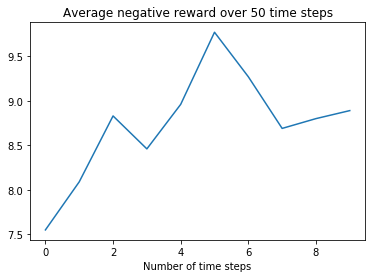

 40%|███▉      | 3998/10000 [06:04<09:20, 10.71it/s]

Time-step: 4000/10000


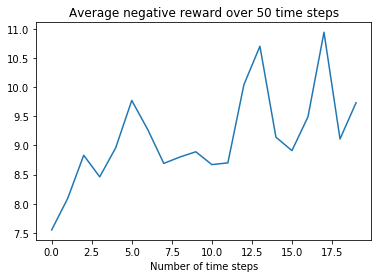

 60%|█████▉    | 5998/10000 [08:12<03:09, 21.17it/s]

Time-step: 6000/10000


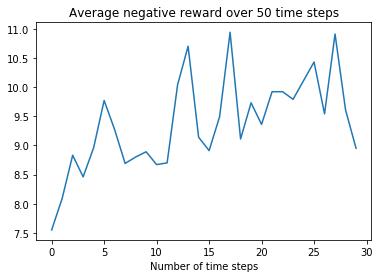

 80%|███████▉  | 7999/10000 [09:56<01:36, 20.77it/s]

Time-step: 8000/10000


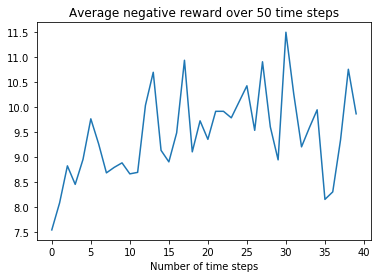

100%|█████████▉| 9998/10000 [11:42<00:00, 17.03it/s]

Time-step: 10000/10000


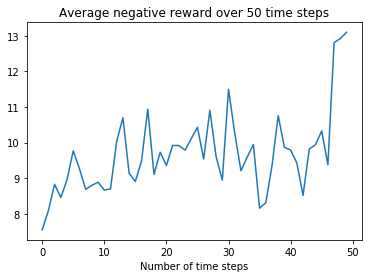

100%|██████████| 10000/10000 [11:42<00:00, 14.23it/s]


In [6]:
acc_neg_reward = [] # Contains negative sum of rewards during episode
num_steps = 10000   # The number of steps to run the simulation
reward_sum = 0

state = env.reset("current")
action = agent.agent_start(state)
    
for i in tqdm(range(num_steps)):
    
    state, reward = env.step(action)
    action = agent.agent_step(reward, state)
    
    reward_sum += reward
    
    if (i+1) % 200 == 0:
        acc_neg_reward.append(-reward_sum/100)
        reward_sum = 0
    
    if (i+1) % 2000 == 0:
        print("Time-step: " + str(i+1) + "/" + str(num_steps))
        plt.plot(range(len(acc_neg_reward)), acc_neg_reward)
        plt.xlabel("Number of time steps")
        plt.title("Average negative reward over 50 time steps")
        plt.show()

In [7]:
agent.q

array([[  0.        ,   0.        ,  -0.1       ,   0.        ],
       [ -0.1       ,   0.        ,  -0.48      ,  -0.79506766],
       [ -1.68393789,  -0.3       ,  -0.2       ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [ -1.71932372,   0.        ,  -1.13387677,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [-14.42273005, -14.86339087, -15.67057885, -13.9170384 ],
       [-21.82415408, -20.30532296, -20.25130925, -19.48971679],
       [ -1.33010205,   0.        ,  -1.85129648,  -0.48      ],
       [-17.23441443, -17.50119378, -18.56603367, -15.29819546],
       [-17.49059026, -17.45151742, -17.99562579, -17.75015422],
       [ -2.07853727,  -1

Text(0.5, 1.0, 'Average negative reward over 50 time steps')

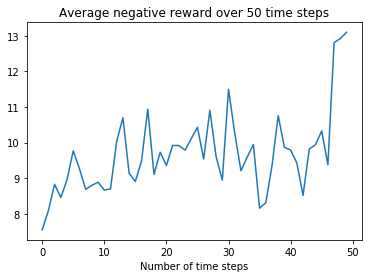

In [8]:
plt.plot(range(len(acc_neg_reward)), acc_neg_reward)
plt.xlabel("Number of time steps")
plt.title("Average negative reward over 50 time steps")

In [18]:
env.close()
env.start()
state = env.reset("current")
rewards = []
for i in range(200):
    state = agent.encode_state(state)
    action = agent.argmax(agent.q[state])
    state, reward = env.step(action)
    rewards.append(reward)
    
print(np.mean(rewards[-10:]))

-5.0


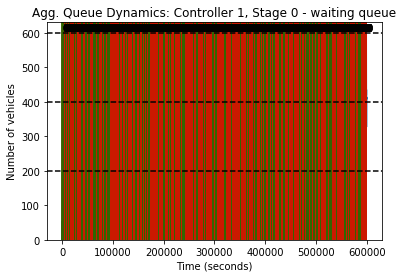

In [9]:
env.plot_agg_queue(1, 0, "waiting")

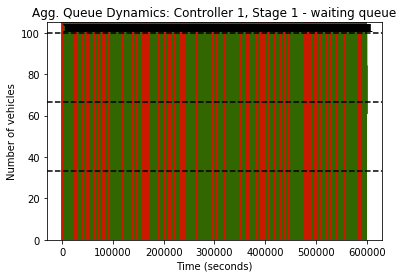

In [10]:
env.plot_agg_queue(1, 1, "waiting")

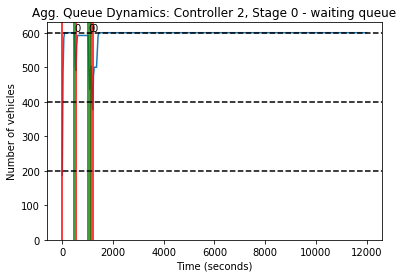

In [12]:
env.plot_agg_queue(2, 0, "waiting")

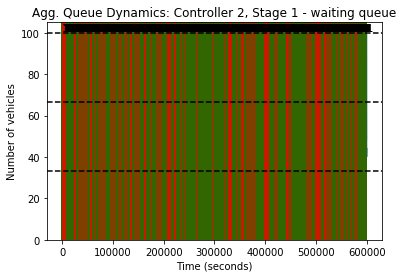

In [11]:
env.plot_agg_queue(2, 1, "waiting")

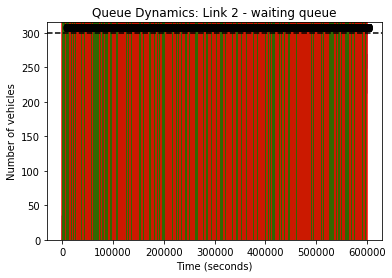

In [14]:

env.plot_link_queue(2, "waiting")